In [ ]:
import warnings; 
warnings.simplefilter('ignore')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
pip install pystan

In [ ]:
pip install fbprophet

In [ ]:
# Python
import pandas as pd
import fbprophet
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
df=pd.read_csv('/content/drive/MyDrive/210619monatszahlenjuni2021monatszahlen2106verkehrsunfaelle.csv')

In [ ]:
df.head()

,MONATSZAHL,AUSPRAEGUNG,JAHR,MONAT,WERT,VORJAHRESWERT,VERAEND_VORMONAT_PROZENT,VERAEND_VORJAHRESMONAT_PROZENT,ZWOELF_MONATE_MITTELWERT
0,Alkoholunfälle,insgesamt,2021,202101,NaN,28.0,NaN,NaN,NaN
1,Alkoholunfälle,insgesamt,2021,202102,NaN,40.0,NaN,NaN,NaN
2,Alkoholunfälle,insgesamt,2021,202103,NaN,27.0,NaN,NaN,NaN
3,Alkoholunfälle,insgesamt,2021,202104,NaN,26.0,NaN,NaN,NaN
4,Alkoholunfälle,insgesamt,2021,202105,NaN,40.0,NaN,NaN,NaN


In [ ]:
df.columns = [each.lower() for each in df.columns]

In [ ]:
df.head()

,monatszahl,auspraegung,jahr,monat,wert,vorjahreswert,veraend_vormonat_prozent,veraend_vorjahresmonat_prozent,zwoelf_monate_mittelwert
0,Alkoholunfälle,insgesamt,2021,202101,NaN,28.0,NaN,NaN,NaN
1,Alkoholunfälle,insgesamt,2021,202102,NaN,40.0,NaN,NaN,NaN
2,Alkoholunfälle,insgesamt,2021,202103,NaN,27.0,NaN,NaN,NaN
3,Alkoholunfälle,insgesamt,2021,202104,NaN,26.0,NaN,NaN,NaN
4,Alkoholunfälle,insgesamt,2021,202105,NaN,40.0,NaN,NaN,NaN


In [ ]:
# we filter for the category and type as requested by task
# we exclude 2021 data, since we are going to forecast for month 01/2021
# in the data there also exist yearly sums, we will exclude these

train_df = df[
    (df.monatszahl == "Alkoholunfälle") &
    (df.auspraegung == "insgesamt") &
    (df.jahr != 2021) &
    (df.monat != "Summe")
].copy().sort_values(
    by="monat"
).reset_index(drop=True)

train_df

,monatszahl,auspraegung,jahr,monat,wert,vorjahreswert,veraend_vormonat_prozent,veraend_vorjahresmonat_prozent,zwoelf_monate_mittelwert
0,Alkoholunfälle,insgesamt,2000,200001,78.0,NaN,NaN,NaN,78.0
1,Alkoholunfälle,insgesamt,2000,200002,53.0,NaN,-32.05,NaN,66.0
2,Alkoholunfälle,insgesamt,2000,200003,73.0,NaN,37.74,NaN,68.0
3,Alkoholunfälle,insgesamt,2000,200004,78.0,NaN,6.85,NaN,71.0
4,Alkoholunfälle,insgesamt,2000,200005,96.0,NaN,23.08,NaN,76.0
...,...,...,...,...,...,...,...,...,...
247,Alkoholunfälle,insgesamt,2020,202008,46.0,31.0,-20.69,48.39,39.0
248,Alkoholunfälle,insgesamt,2020,202009,46.0,47.0,0.00,-2.13,39.0
249,Alkoholunfälle,insgesamt,2020,202010,34.0,45.0,-26.09,-24.44,38.0
250,Alkoholunfälle,insgesamt,2020,202011,23.0,29.0,-32.35,-20.69,38.0


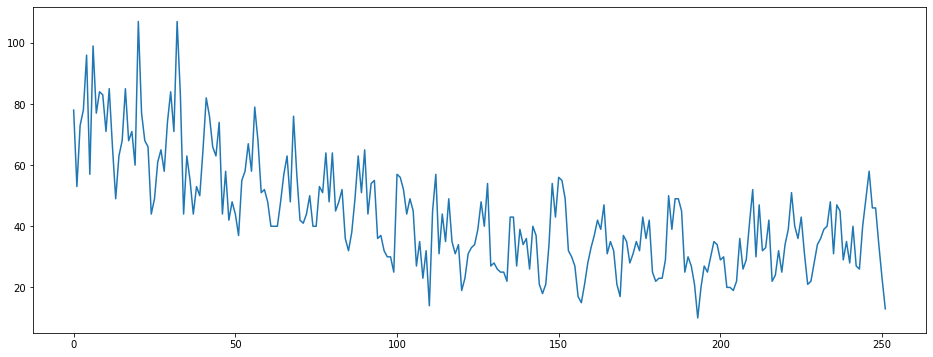

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(16,6))
plt.plot(train_df.wert)
plt.show()

In [ ]:
from fbprophet import Prophet

In [ ]:
train_df.drop(['monatszahl', 'auspraegung', 'jahr', 'vorjahreswert', 'veraend_vormonat_prozent', 'veraend_vorjahresmonat_prozent', 'zwoelf_monate_mittelwert'], axis=1, inplace=True)

In [ ]:
train_df.head()

,monat,wert
0,200001,78.0
1,200002,53.0
2,200003,73.0
3,200004,78.0
4,200005,96.0


In [ ]:
train_df.columns = ['ds', 'y']

In [ ]:
train_df.head()

,ds,y
0,200001,78.0
1,200002,53.0
2,200003,73.0
3,200004,78.0
4,200005,96.0


In [ ]:
train_df['ds'] = pd.to_datetime(train_df['ds'].astype(str), format='%Y%m', errors='coerce').dropna()

In [ ]:
train_df.head()

,ds,y
0,2000-01-01,78.0
1,2000-02-01,53.0
2,2000-03-01,73.0
3,2000-04-01,78.0
4,2000-05-01,96.0


In [ ]:
train_df.tail()

,ds,y
247,2020-08-01,46.0
248,2020-09-01,46.0
249,2020-10-01,34.0
250,2020-11-01,23.0
251,2020-12-01,13.0


In [ ]:
# Initialize the Model
model = Prophet(weekly_seasonality=True, daily_seasonality=True)

In [ ]:
train_df.columns

Index(['ds', 'y'], dtype='object')

In [ ]:
model.fit(train_df)

In [ ]:
model.component_modes

{'additive': ['yearly',
  'weekly',
  'daily',
  'additive_terms',
  'extra_regressors_additive',
  'holidays'],
 'multiplicative': ['multiplicative_terms', 'extra_regressors_multiplicative']}

In [ ]:
### Create future dates of 12 months
future = model.make_future_dataframe(periods=24, freq = 'MS')
future.tail()
#future = m.make_future_dataframe(periods=120, freq='MS')
#fcst = m.predict(future)
#fig = m.plot(fcst)

,ds
271,2022-08-01
272,2022-09-01
273,2022-10-01
274,2022-11-01
275,2022-12-01


In [ ]:
forecast = model.predict(future)

In [ ]:
forecast.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,daily_lower,daily_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
271,2022-08-01,34.419970,26.475698,45.810133,34.101638,34.730413,1.422545,1.422545,1.422545,-1.522804,-1.522804,-1.522804,-0.405959,-0.405959,-0.405959,3.351308,3.351308,3.351308,0.0,0.0,0.0,35.842515
272,2022-09-01,34.423636,35.416156,54.646744,34.075976,34.768563,10.079697,10.079697,10.079697,-1.522804,-1.522804,-1.522804,-2.756331,-2.756331,-2.756331,14.358833,14.358833,14.358833,0.0,0.0,0.0,44.503333
273,2022-10-01,34.427184,28.799578,48.080416,34.054112,34.793429,3.740019,3.740019,3.740019,-1.522804,-1.522804,-1.522804,1.086575,1.086575,1.086575,4.176248,4.176248,4.176248,0.0,0.0,0.0,38.167203
274,2022-11-01,34.430850,17.832609,36.433383,34.029944,34.827204,-7.190234,-7.190234,-7.190234,-1.522804,-1.522804,-1.522804,-1.523741,-1.523741,-1.523741,-4.143688,-4.143688,-4.143688,0.0,0.0,0.0,27.240616
275,2022-12-01,34.434398,17.576162,37.398507,34.006056,34.857194,-7.311125,-7.311125,-7.311125,-1.522804,-1.522804,-1.522804,-2.756331,-2.756331,-2.756331,-3.031990,-3.031990,-3.031990,0.0,0.0,0.0,27.123273


In [ ]:
forecast.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,daily_lower,daily_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2000-01-01,77.507018,56.772970,75.777536,77.507018,77.507018,-11.163917,-11.163917,-11.163917,-1.522804,-1.522804,-1.522804,1.086575,1.086575,1.086575,-10.727688,-10.727688,-10.727688,0.0,0.0,0.0,66.343101
1,2000-02-01,77.148971,50.422545,70.334504,77.148971,77.148971,-16.598725,-16.598725,-16.598725,-1.522804,-1.522804,-1.522804,-1.523741,-1.523741,-1.523741,-13.552179,-13.552179,-13.552179,0.0,0.0,0.0,60.550246
2,2000-03-01,76.814023,59.714841,78.500837,76.814023,76.814023,-7.885757,-7.885757,-7.885757,-1.522804,-1.522804,-1.522804,1.559825,1.559825,1.559825,-7.922778,-7.922778,-7.922778,0.0,0.0,0.0,68.928266
3,2000-04-01,76.455975,61.343368,80.003185,76.455975,76.455975,-6.003249,-6.003249,-6.003249,-1.522804,-1.522804,-1.522804,1.086575,1.086575,1.086575,-5.567020,-5.567020,-5.567020,0.0,0.0,0.0,70.452727
4,2000-05-01,76.109478,72.116725,91.264138,76.109478,76.109478,5.361052,5.361052,5.361052,-1.522804,-1.522804,-1.522804,-0.405959,-0.405959,-0.405959,7.289816,7.289816,7.289816,0.0,0.0,0.0,81.470530


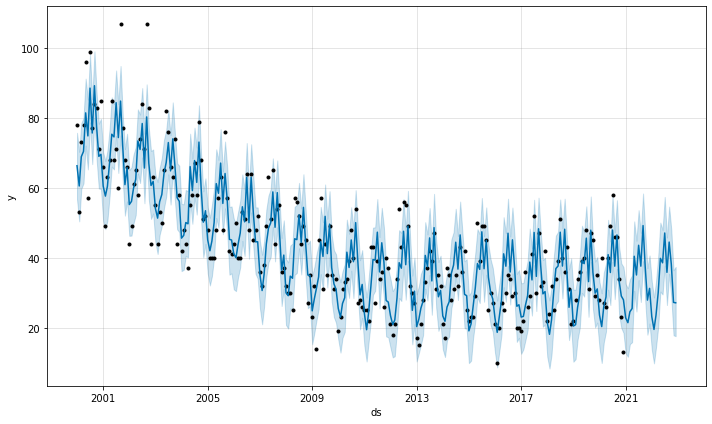

In [ ]:
model.plot(forecast);

In [ ]:
{
    "year": 2021,
    "month": 10
}
ind = input_json["month"] # == 10
return my_result[ind-1]

NameError: ignored